In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn.model_selection import train_test_split #разделение выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

C:\Users\sadeyes\AppData\Local\Temp\ipykernel_2568\2408503256.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
churn_data = pd.read_csv('data/churn.zip').drop(columns='RowNumber')
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* CustomerId — идентификатор клиента;
* Surname — фамилия клиента;
* CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);
* Geography — страна проживания клиента (банк межнациональный);
* Gender — пол клиента;
* Age — возраст клиента;
* Tenure — сколько лет клиент пользуется банком;
* Balance — сколько у клиента денег на счетах в банке;
* NumOfProduct — число услуг банка, которые приобрёл клиент;
* HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет);
* IsActiveMember — есть ли у клиента статус активного участника банка (1 — да, 0 — нет);
* EstimatedSalary — предполагаемая заработная плата клиента;
* Exited — статус ушедшего (1 — ушедший клиент, 0 — лояльный клиент).

In [3]:
churn_data = churn_data[churn_data['Geography'] == 'Germany']
churn_data.shape

(2509, 13)

In [4]:
churn_data = churn_data.drop(['Geography', 'CustomerId', 'Surname'], axis=1)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


In [5]:
churn_data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* BalanceSalaryRatio — отношение баланса на счетах к заработной плате клиента;
* TenureByAge — отношение времени пользования банком к возрасту клиента;
* CreditScoreGivenAge — отношение кредитного рейтинга к возрасту клиента.

In [6]:
churn_data['BalanceSalaryRatio'] = churn_data['Balance']/churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure']/(churn_data['Age'])
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore']/(churn_data['Age'])

In [7]:
churn_data['Gender'] = churn_data['Gender'].apply(lambda x: int(x=='Male'))
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
15,616,1,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
16,653,1,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621
26,756,1,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000
28,574,0,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837


In [8]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

In [9]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [10]:
y.value_counts(normalize=True)

0    0.675568
1    0.324432
Name: Exited, dtype: float64

Очевидно, что наши классы не сбалансированы. Ушедших пользователей — 32 %, в то время как лояльных — 68 %. 

То есть нам нужно сделать так, чтобы в тренировочной и тестовой выборках было одинаковое соотношение лояльных и ушедших клиентов. Такое разбиение выборки называется **стратифицированным**. 



In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=0)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


In [12]:
print('Train:\n', y_train.value_counts(normalize=True), sep='')
print('\n')
print('Test:\n', y_test.value_counts(normalize=True), sep='')

Train:
0    0.675704
1    0.324296
Name: Exited, dtype: float64


Test:
0    0.675159
1    0.324841
Name: Exited, dtype: float64


In [13]:
logreg_model = linear_model.LogisticRegression(
    random_state=42,
    solver='sag'
)
logreg_model.fit(X_train, y_train)

y_train_pred = logreg_model.predict(X_train)
y_test_pred = logreg_model.predict(X_test)

print('Train F1:', metrics.f1_score(y_train, y_train_pred).round(2))
print('Test F1:', metrics.f1_score(y_test, y_test_pred).round(2))

Train F1: 0.49
Test F1: 0.47


In [14]:
poly = preprocessing.PolynomialFeatures(
    degree=3,
    include_bias=False
)
poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print(X_train_poly.shape, X_test_poly.shape)

(1881, 454) (628, 454)


In [15]:
logreg_model = linear_model.LogisticRegression(
    random_state=42,
    solver='sag',
    max_iter=1000
)
logreg_model.fit(X_train_poly, y_train)

y_train_poly_pred = logreg_model.predict(X_train_poly)
y_test_poly_pred = logreg_model.predict(X_test_poly)

print('Train poly F1:', metrics.f1_score(y_train, y_train_poly_pred).round(2))
print('Test poly F1:', metrics.f1_score(y_test, y_test_poly_pred).round(2))

Train poly F1: 0.66
Test poly F1: 0.64


Text(0.5, 1.0, 'F1-score on test depends on threshold')

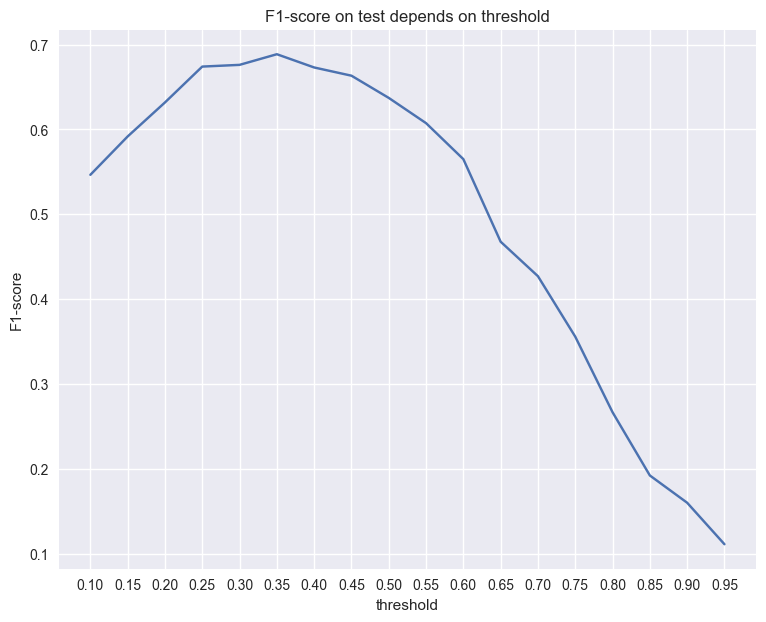

In [16]:
thresholds = np.arange(0.1, 1, 0.05)
fig, ax = plt.subplots(figsize=(9, 7))
f1_scores = []
for threshold in thresholds:
    y_test_pred = logreg_model.predict_proba(X_test_poly)[:, 1]
    y_test_pred = pd.Series(y_test_pred)
    y_test_pred = y_test_pred.apply(lambda x: int(x > threshold))
    f1_score = metrics.f1_score(y_test, y_test_pred)
    f1_scores.append(f1_score)
    
sns.lineplot(
    x=thresholds,
    y=f1_scores,
    ax=ax
)
ax.set_xticks(thresholds)
ax.set_xlabel('threshold')
ax.set_ylabel('F1-score')
ax.set_title('F1-score on test depends on threshold')

In [17]:
optimal_threshold = 0.35
y_pred_optimal = pd.Series(logreg_model.predict_proba(X_test_poly)[:, 1])
y_pred_optimal = y_pred_optimal.apply(lambda x: int(x > optimal_threshold))
print('F1-score test optimal threshold:', metrics.f1_score(y_test, y_pred_optimal).round(2))

F1-score test optimal threshold: 0.69


# Decision trees and random forest
## 7.1:

In [19]:
from sklearn import tree
from sklearn import ensemble

In [21]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


In [24]:
dt_model = tree.DecisionTreeClassifier(
    random_state=42,
    max_depth=8,
    criterion='entropy',
    min_samples_leaf=10
)
dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

print('Train F1:', metrics.f1_score(y_train, y_train_pred).round(2))
print('Test F1:', metrics.f1_score(y_test, y_test_pred).round(2))

Train F1: 0.72
Test F1: 0.64


## 7.2:

In [25]:
rf_model = ensemble.RandomForestClassifier(
    n_estimators=500,
    max_depth=8,
    criterion='entropy',
    min_samples_leaf=10,
    random_state=42
)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print('Train F1:', metrics.f1_score(y_train, y_train_pred).round(2))
print('Test F1:', metrics.f1_score(y_test, y_test_pred).round(2))

Train F1: 0.74
Test F1: 0.66


## 7.4:

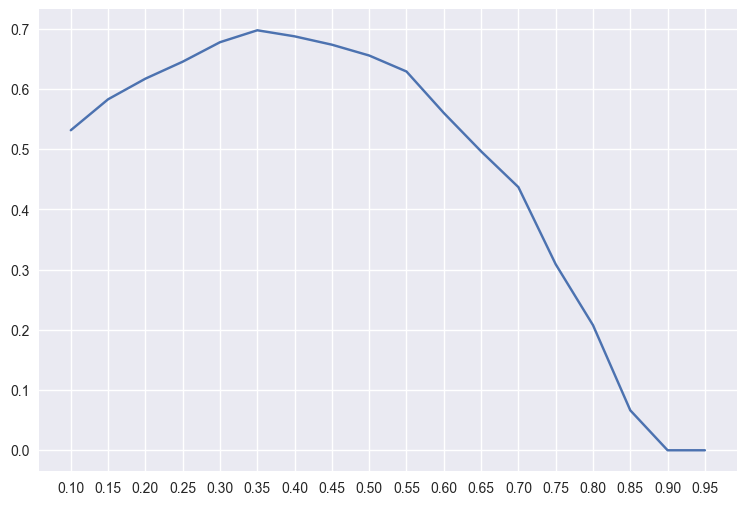

In [26]:
thresholds = np.arange(0.1, 1, 0.05)
f1_scores = []
for threshold in thresholds:
    y_test_pred_prob = pd.Series(rf_model.predict_proba(X_test)[:, 1])
    y_test_pred_prob = y_test_pred_prob.apply(lambda x: int(x > threshold))
    f1_score = metrics.f1_score(y_test, y_test_pred_prob)
    f1_scores.append(f1_score)

fig, ax = plt.subplots(figsize=(9, 6))    
sns.lineplot(
    x=thresholds,
    y=f1_scores,
    ax=ax
)
ax.set_xticks(thresholds);

In [29]:
threshold_opt = 0.35
y_test_pred_opt = pd.Series(rf_model.predict_proba(X_test)[:, 1]).apply(lambda x: int(x > threshold_opt))
print('Test optimal F1:', metrics.f1_score(y_test, y_test_pred_opt).round(2))

Test optimal F1: 0.7
